<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="HEIG-VD Logo" width="100" align="right" /> 

# Cours TAL - Laboratoire 4<br/>Reconnaissance des entités nommées

**Objectif**

L'objectif de ce travail est de comparer la reconnaissance des entités nommées (*named entity recognition*, NER) faite par quatre systèmes : NLTK, spaCy (deux modèles, 'en_core_web_sm' et 'en_core_web_lg'), et DistilBERT/NER.  Les données de test en anglais vous sont fournies sur Cyberlearn au format CoNLL.  Pour comparer les systèmes, on utilise la macro-moyenne des scores f1 pour chaque étiquette.  Vous pouvez concevoir l'ensemble du projet par vous-mêmes, ou suivre les indications suivantes.

## 1. NER avec spaCy et NLTK sur un texte court

In [6]:
import spacy
from spacy.tokens import Doc

In [7]:
#!python -m spacy download en_core_web_sm 
#!python -m spacy download en_core_web_lg
# exécuter la ligne ci-dessus une fois, si nécessaire, idem pour en_core_web_lg

In [8]:
nlp = spacy.load("en_core_web_sm")

In [9]:
raw_text = "Reinhold Messner made a solo ascent of Mount Everest and was later a member of the European Parliament." 

**1a.** Veuillez traiter ce texte avec la pipeline 'nlp', et pour chaque entité nommée trouvée veuillez afficher les mots qui la composent et son type.

In [10]:
treated_text = nlp(raw_text)

for ent in treated_text.ents:
    
    print(f"Named Entity: {ent.text}, Type: {ent.label_}")

Named Entity: Reinhold Messner, Type: ORG
Named Entity: Mount Everest, Type: LOC
Named Entity: the European Parliament, Type: ORG


In [11]:
import nltk
nltk.download('maxent_ne_chunker') 
nltk.download('words') 
nltk.download('maxent_ne_chunker_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')
# exécuter les deux lignes ci-dessus une fois, si nécessaire

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/massimo/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/massimo/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /home/massimo/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/massimo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/massimo/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**1b.** Veuillez effectuer avec NLTK la tokenization, le POS tagging et le *NE chunking* de `raw_text` (voir la [documentation NLTK](https://www.nltk.org/api/nltk.chunk.ne_chunk.html#nltk.chunk.ne_chunk)).  Veuillez afficher le résultat et indiquer son type.

<class 'nltk.tree.tree.Tree'>


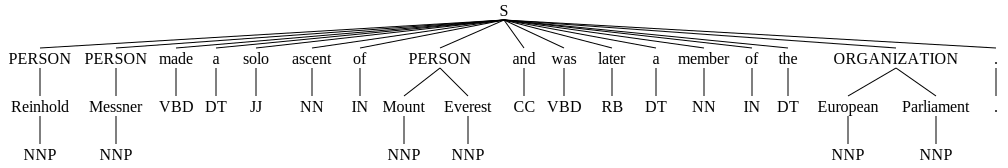

In [12]:
# Prepare the raw text
tokens = nltk.word_tokenize(raw_text)
tagged_tokens = nltk.pos_tag(tokens)

# chunking
chunked = nltk.chunk.ne_chunk(tagged_tokens, binary=False)

print(type(chunked))
chunked



## https://www.nltk.org/book/ch03.html#sec-accessing-text

##  nltk.chunk.ne_chunk(tagged_tokens, binary=False)

**1c.** Veuillez afficher, pour chaque entité nommée, les mots qui la composent et son type.  Vous pouvez parcourir le résultat précédent avec une boucle `for`, et déterminer si un noeud possède une étiquette avec la fonction `hasattr(noeud, 'label')`.

In [13]:
for noeud in chunked:
    if hasattr(noeud, 'label'):
        print(f"Named Entity: {' '.join(c[0] for c in noeud)}, Type: {noeud.label()}")
    else:
        print(f"Token: {noeud[0]}, Type: {noeud[1]}")

Named Entity: Reinhold, Type: PERSON
Named Entity: Messner, Type: PERSON
Token: made, Type: VBD
Token: a, Type: DT
Token: solo, Type: JJ
Token: ascent, Type: NN
Token: of, Type: IN
Named Entity: Mount Everest, Type: PERSON
Token: and, Type: CC
Token: was, Type: VBD
Token: later, Type: RB
Token: a, Type: DT
Token: member, Type: NN
Token: of, Type: IN
Token: the, Type: DT
Named Entity: European Parliament, Type: ORGANIZATION
Token: ., Type: .


**1d.** À ce stade, que pensez-vous de la qualité des résultats de chaque système ?

In [14]:
# https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk
# La première erreur -> Reinhold Messner est considéré comme deux personnes au lieu d'une seule
# La seconde erreur -> Mount Everest est une location, et non une personne
# Mais c'est la seule erreur de tagging, donc c'est pas si mal

## 2. Prise en main des données de test

**2a.** Quel est le format du fichier `eng.test.a.conll` ?  Quelle information contient chaque colonne ?  Quel est le format des tags NE ?

Note : ce fichier fait partie des données de test pour la NER sur l'anglais de la conférence [CoNLL](https://www.clips.uantwerpen.be/pages/past-workshops) 2003. On peut lire [ici](https://www.clips.uantwerpen.be/conll2003/ner/) la description de la tâche et les scores obtenus.  On peut trouver une copie des données [ici](https://sourceforge.net/p/text-analysis/svn/1243/tree/text-analysis/trunk/Corpora/CoNLL/2003/) ou [ici](https://github.com/synalp/NER/tree/master/corpus/CoNLL-2003).  Les textes proviennent du [corpus Reuters](http://trec.nist.gov/data/reuters/reuters.html).

In [15]:
# eng.test.a.conll est un fichier de format CoNLL. Les colonnes:
# - 1 : le mot
# - 2 : le tag du mot
# - 3 : étiquette de typologie du chunk
# - 4 : le format IOB

# https://hal.science/hal-02567769v1/document

**2b.** Veuillez charger les données de `eng.test.a.conll` grâce à la classe `ConllCorpusReader` de NLTK vue dans les labos précédents (voir [documentation](https://www.nltk.org/api/nltk.corpus.reader.conll.html#nltk.corpus.reader.conll.ConllCorpusReader)). Veuillez lire les colonnes qui contiennent les tokens ('words'), les POS tags ('pos') et les informations sur les entités nommées ('chunk') et afficher les quatre premières phrases, accessibles via la méthode `.iob_sents()`.

In [16]:
from nltk.corpus.reader import ConllCorpusReader

test_corpus = ConllCorpusReader('.', 'eng.test.a.conll', ['words', 'pos', 'ignore','chunk'])

iob_sentences = test_corpus.iob_sents()

for i, sentence in enumerate(iob_sentences[1:5]): #La première phrase étant vide
    print(f"Sentence {i + 1}: {sentence}")

Sentence 1: [('CRICKET', 'NNP', 'O'), ('-', ':', 'O'), ('LEICESTERSHIRE', 'NNP', 'I-ORG'), ('TAKE', 'NNP', 'O'), ('OVER', 'IN', 'O'), ('AT', 'NNP', 'O'), ('TOP', 'NNP', 'O'), ('AFTER', 'NNP', 'O'), ('INNINGS', 'NNP', 'O'), ('VICTORY', 'NN', 'O'), ('.', '.', 'O')]
Sentence 2: [('LONDON', 'NNP', 'I-LOC'), ('1996-08-30', 'CD', 'O')]
Sentence 3: [('West', 'NNP', 'I-MISC'), ('Indian', 'NNP', 'I-MISC'), ('all-rounder', 'NN', 'O'), ('Phil', 'NNP', 'I-PER'), ('Simmons', 'NNP', 'I-PER'), ('took', 'VBD', 'O'), ('four', 'CD', 'O'), ('for', 'IN', 'O'), ('38', 'CD', 'O'), ('on', 'IN', 'O'), ('Friday', 'NNP', 'O'), ('as', 'IN', 'O'), ('Leicestershire', 'NNP', 'I-ORG'), ('beat', 'VBD', 'O'), ('Somerset', 'NNP', 'I-ORG'), ('by', 'IN', 'O'), ('an', 'DT', 'O'), ('innings', 'NN', 'O'), ('and', 'CC', 'O'), ('39', 'CD', 'O'), ('runs', 'NNS', 'O'), ('in', 'IN', 'O'), ('two', 'CD', 'O'), ('days', 'NNS', 'O'), ('to', 'TO', 'O'), ('take', 'VB', 'O'), ('over', 'IN', 'O'), ('at', 'IN', 'O'), ('the', 'DT', 'O'), 

In [17]:
from nltk.corpus.reader.conll import ConllCorpusReader

**2c.** Veuillez préparer les données pour le test, en ne gardant que les phrases ayant au moins trois (3) tokens (pas 0, 1, 2) :

* une variable `test_tokens` contiendra les tokens groupés par phrase (liste de listes de strings)
* une variable `test_tags` contiendra tous les tags NE en une seule liste (en vue de l'évaluation)

In [18]:
test_tokens = []
test_tags = []
saved_sentences = [sent for sent in test_corpus.iob_sents() if len(sent) >= 3]

for sent in saved_sentences:
    sent_token = []
    for token, tag, chunk in sent:
        sent_token.append(token)
        test_tags.append(chunk)
    test_tokens.append(sent_token)

print(len(test_tokens))
print(sum(len(sent) for sent in test_tokens))
print(test_tokens[:3])
    

2970
50817
[['CRICKET', '-', 'LEICESTERSHIRE', 'TAKE', 'OVER', 'AT', 'TOP', 'AFTER', 'INNINGS', 'VICTORY', '.'], ['West', 'Indian', 'all-rounder', 'Phil', 'Simmons', 'took', 'four', 'for', '38', 'on', 'Friday', 'as', 'Leicestershire', 'beat', 'Somerset', 'by', 'an', 'innings', 'and', '39', 'runs', 'in', 'two', 'days', 'to', 'take', 'over', 'at', 'the', 'head', 'of', 'the', 'county', 'championship', '.'], ['Their', 'stay', 'on', 'top', ',', 'though', ',', 'may', 'be', 'short-lived', 'as', 'title', 'rivals', 'Essex', ',', 'Derbyshire', 'and', 'Surrey', 'all', 'closed', 'in', 'on', 'victory', 'while', 'Kent', 'made', 'up', 'for', 'lost', 'time', 'in', 'their', 'rain-affected', 'match', 'against', 'Nottinghamshire', '.']]


**2d.** Combien d'occurrences de tags contient `test_tags`?  Combien de tags différents y a-t-il, et lesquels sont-ils ?  Combien il y a d'occurrences de tags de chaque type ?  Combien de phrases y a-t-il dans `test_tokens` ?

In [19]:
different_tags = set(test_tags)
different_tags_count = [(tag, test_tags.count(tag)) for tag in different_tags]
print(len(different_tags))
print(different_tags_count)
## count total
print(f"Nombre d’apparition des tags total : {sum([count for tag, count in different_tags_count])}")

5
[('I-MISC', 1228), ('O', 42474), ('I-ORG', 2080), ('I-LOC', 1938), ('I-PER', 3097)]
Nombre d’apparition des tags total : 50817


## 3. Performances de NLTK pour la NER

**3a.** Le NER de NLTK a un jeu de tags différents de celui des données de test.  Veuillez chercher les informations pour compléter la fonction suivante qui convertit chaque tag du NER de NLTK vers le tag correspondant pour les données de test. 

In [20]:
def convert_nltk_conll(nltk_tag):
    corresp = {
        'O': 'O',  
        'ORGANIZATION': 'I-ORG',  
        'PERSON': 'I-PER',  
        'LOCATION': 'I-LOC',  
        'GPE': 'I-LOC',  
        'FACILITY': 'I-LOC', 
        'GSP': 'I-MISC',
        'MISC': 'I-MISC'  
    }
    return corresp.get(nltk_tag, 'O') # Default to O just in case 


**3b.** Veuillez exécuter la NER de NLTK sur chacune des phrases de `test_tokens`, ce qui assure que NLTK aura la même tokenisation que les données de référence.  Veuillez stocker les tags dans une liste unique appelée `nltk_tags`.

In [21]:
print(len(test_tokens))
tagged_sentences = nltk.pos_tag_sents(test_tokens)

2970


In [ ]:
nltk_tags = []

chunked_sentences = nltk.ne_chunk_sents(tagged_sentences)

for sentence in chunked_sentences:
    for element in sentence:
        if hasattr(element, 'label'):
            for word in element.leaves():
                nltk_tags.append(element.label())
        else:
            nltk_tags.append('O')

print(f"Nombre total de tags: {len(nltk_tags)}")
print(f"10 Premiers tags: {nltk_tags[:10]}")


Total number of tags: 50817
The first 10 tags: ['GPE', 'O', 'ORGANIZATION', 'O', 'O', 'O', 'ORGANIZATION', 'O', 'ORGANIZATION', 'O']


In [23]:
total_tokens = sum(len(sent) for sent in tagged_sentences)
print(f"Total tokens in input: {total_tokens}")
print(f"Total tags generated: {len(nltk_tags)}")

Total tokens in input: 50817
Total tags generated: 50817


**3c.** Veuillez convertir les tags de `nltk_tags` grâce à la fonction précédente, dans une liste appelée `nltk_tags_conv`.  Veuillez afficher le nombre total de tags et les dix premiers.  Vous pouvez plusieurs essais en changeant la fonction, pour aboutir à la conversion qui maximise le score.

In [55]:
nltk_tags_conv = [convert_nltk_conll(tag) for tag in nltk_tags]

# Display the total number of tags and the first 10 tags
print(f"Nombre total de tags: {len(nltk_tags_conv)}")
print(f"10 Premiers tags: {nltk_tags_conv[:10]}")

Nombre total de tags: 50817
10 Premiers tags: ['I-LOC', 'O', 'I-ORG', 'O', 'O', 'O', 'I-ORG', 'O', 'I-ORG', 'O']


**3d.** Veuillez afficher le rapport d'évaluation de classification obtenu de Scikit-learn et la matrice de confusion pour tous les types de tags apparaissant dans les données de test.

In [25]:
from sklearn.metrics import classification_report

labels = ['I-ORG', 'I-PER', 'I-LOC', 'I-MISC','O']

report = classification_report(
    test_tags,
    nltk_tags_conv, 
    labels=labels, 
    zero_division=0, 
    digits=4)

print(report)

              precision    recall  f1-score   support

       I-ORG     0.5094    0.3500    0.4149      2080
       I-PER     0.7671    0.7446    0.7557      3097
       I-LOC     0.5451    0.7203    0.6206      1938
      I-MISC     0.1556    0.0057    0.0110      1228
           O     0.9597    0.9891    0.9742     42474

    accuracy                         0.9140     50817
   macro avg     0.5874    0.5619    0.5553     50817
weighted avg     0.8943    0.9140    0.9012     50817



<Figure size 1000x800 with 0 Axes>

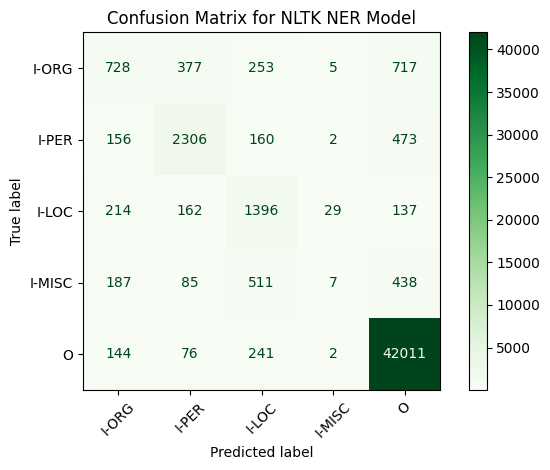

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_tags, nltk_tags_conv, labels=labels)

plt.figure(figsize=(10, 8))
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=labels)

display.plot(cmap='Greens', xticks_rotation=45)
plt.title('Confusion Matrix for NLTK NER Model')
plt.tight_layout()
plt.show()

## 4. Performances de spaCy pour la NER

**4a.** Le NER de spaCy a aussi un jeu de tags différents de celui des données de test.  Veuillez chercher les informations pour compléter la fonction suivante qui convertir chaque tag du NER de spaCy dans le tag correspondant pour les données de test.  Attention à la logique des conversions. 

In [27]:
def convert_spacy_conll(spacy_tag):
    corresp = {
        'O': 'O',
        'ORG': 'I-ORG',  
        'PERSON': 'I-PER',
        'LOC': 'I-LOC',
        'GPE': 'I-LOC',
        'FAC': 'I-LOC',
        'MISC': 'I-MISC',
        'NORP': 'I-MISC',
        'PRODUCT': 'I-MISC',
        'LAW': 'I-MISC',
        'MONEY': 'O',
        'LANGUAGE' : 'O',
        'PRODUCT' : 'O',
        'EVENT' : 'O',
        'WORK_OF_ART' : 'I-MISC',
        'CARDINAL' : 'O',
        'ORDINAL' : 'O',
        'TIME' : 'O',
        'DATE' : 'O',
    }
    return corresp.get(spacy_tag, 'O')


**4b.** Veuillez exécuter la NER de spaCy sur chacune des phrases de `test_tokens`, ce qui assure que spaCy aura la même tokenisation que les données de référence.  Veuillez stocker les tags dans une liste unique appelée `spacy_tags`.

In [28]:
from spacy.tokens import Doc

spacy_tags = []

for sentence in test_tokens:
    doc = Doc(nlp.vocab, words=sentence)
    doc = nlp.get_pipe("ner")(doc)
    for token in doc:
        tag = token.ent_type_ if token.ent_iob_ != 'O' else 'O'
        spacy_tags.append(tag)


In [29]:
print(f"Total tokens in input: {total_tokens}")
print(f"Nombre total de tags : {len(spacy_tags)}")
## print different tags
different_tags = set(spacy_tags)
print(f"Tags différents : {(different_tags)}")
print(f"Nombre total de tags : {len(different_tags)}")

Total tokens in input: 50817
Nombre total de tags : 50817
Tags différents : {'PRODUCT', 'LANGUAGE', 'QUANTITY', 'ORDINAL', 'PERSON', 'LAW', 'CARDINAL', 'TIME', 'GPE', 'NORP', 'ORG', 'MONEY', 'LOC', 'WORK_OF_ART', 'O', 'DATE', 'EVENT', 'FAC', 'PERCENT'}
Nombre total de tags : 19


**4c.** Veuillez convertir les tags de `spacy_tags` grâce à la fonction précédente, dans une liste appelée `spacy_tags_conv`.  Veuillez afficher le nombre total de tags et les dix premiers.  Vous pouvez plusieurs essais en changeant la fonction, pour aboutir à la conversion qui maximise le score.

In [30]:
spacy_tags_conv = [convert_spacy_conll(tag) for tag in spacy_tags]
print(f"Nombre total de tags : {len(spacy_tags_conv)}")
print(f"Tags différents : {(set(spacy_tags_conv))}")
print(f"Nombre total de tags : {len(set(spacy_tags_conv))}")
print(f"10 premiers tags : {spacy_tags_conv[:10]}")

Nombre total de tags : 50817
Tags différents : {'I-MISC', 'O', 'I-ORG', 'I-LOC', 'I-PER'}
Nombre total de tags : 5
10 premiers tags : ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


**4d.** Veuillez afficher le rapport d'évaluation de classification obtenu de Scikit-learn et la matrice de confusion pour tous les types de tags apparaissant dans les données de test.

In [31]:
from sklearn.metrics import classification_report

report = classification_report(
    y_true=test_tags,
    y_pred=spacy_tags_conv,
    labels=labels, 
    zero_division=0, 
    digits=4
)
print(report)


              precision    recall  f1-score   support

       I-ORG     0.5230    0.5240    0.5235      2080
       I-PER     0.8262    0.7123    0.7650      3097
       I-LOC     0.7925    0.8019    0.7971      1938
      I-MISC     0.8182    0.4910    0.6137      1228
           O     0.9623    0.9825    0.9723     42474

    accuracy                         0.9285     50817
   macro avg     0.7844    0.7023    0.7343     50817
weighted avg     0.9260    0.9285    0.9259     50817



<Figure size 1000x800 with 0 Axes>

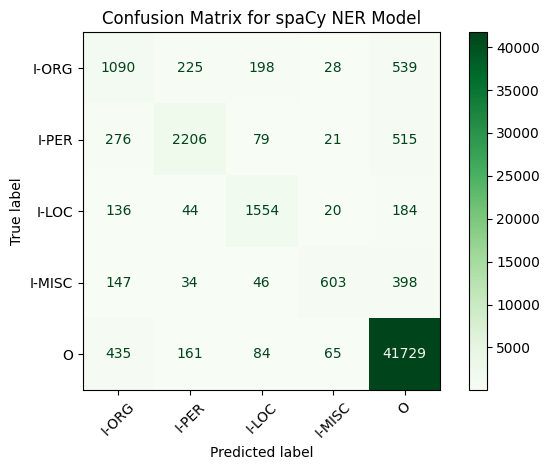

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_tags, spacy_tags_conv, labels=labels)

plt.figure(figsize=(10, 8))
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=labels)

display.plot(cmap='Greens', xticks_rotation=45)
plt.title('Confusion Matrix for spaCy NER Model')
plt.tight_layout()
plt.show()

**4e.** Veuillez exécuter également le modèle 'en_core_web_lg' de spacy et afficher le rapport d'évaluation (il n'est pas demander d'afficher la matrice de confusion).  Vous pouvez recopier ici le minimum de code nécessaire à l'obtention des résultats, avec une nouvelle pipeline spaCy appelée 'nlp2'.

In [33]:
#!python -m spacy download en_core_web_lg

nlp2 = spacy.load("en_core_web_lg")

spacy_tags2 = []

for sentence in test_tokens:
    doc = Doc(nlp2.vocab, words=sentence)
    doc = nlp2.get_pipe("ner")(doc)
    for token in doc:
        tag = token.ent_type_ if token.ent_iob_ != 'O' else 'O'
        spacy_tags2.append(tag)


spacy_tags_conv2 = [convert_spacy_conll(tag) for tag in spacy_tags2]
print(f"Nombre total de tags : {len(spacy_tags_conv2)}")
print(f"Tags différents : {(set(spacy_tags_conv2))}")
print(f"Nombre total de tags : {len(set(spacy_tags_conv2))}")
report = classification_report(
    y_true=test_tags,
    y_pred=spacy_tags_conv2,
    labels=labels, 
    zero_division=0, 
    digits=4
)
print(report)

Nombre total de tags : 50817
Tags différents : {'I-MISC', 'O', 'I-ORG', 'I-LOC', 'I-PER'}
Nombre total de tags : 5
              precision    recall  f1-score   support

       I-ORG     0.5518    0.6019    0.5758      2080
       I-PER     0.9135    0.8185    0.8634      3097
       I-LOC     0.7541    0.8736    0.8095      1938
      I-MISC     0.8717    0.5147    0.6472      1228
           O     0.9738    0.9814    0.9776     42474

    accuracy                         0.9405     50817
   macro avg     0.8130    0.7580    0.7747     50817
weighted avg     0.9420    0.9405    0.9398     50817



## 5. Utilisation d'embeddings contextualisés fournis par BERT

Dans cette section, vous allez évaluer un modèle basé sur le Transformer, qui fournit des embeddings contextualisés pour chaque token.  Ces embeddings sont ensuite utilisés par une couche finale (appelée _NER head_) pour assigner à chaque token une étiquette indiquant les entités nommées.  Le modèle et les instructions pour l'utiliser sont disponibles ici : https://huggingface.co/dslim/distilbert-NER (il s'agit d'une version de BERT "distillée" dans un modèle plus léger, suivi du _NER head_).

**5a.** Prise en main du modèle : à l'aide des exemples fournis sur Hugging Face, veuillez appliquer DistilBERT_NER sur les 3 premières phrases des données contenues dans `test_tokens` (voir le point 2c) et afficher les résultats obtenus.  Quelles sont les différences avec les résultats de NLTK et de spaCy ?

In [34]:
# The three first sentences 
exSent = [" ".join(sen) for sen in test_tokens[:3]]
print(exSent)



['CRICKET - LEICESTERSHIRE TAKE OVER AT TOP AFTER INNINGS VICTORY .', 'West Indian all-rounder Phil Simmons took four for 38 on Friday as Leicestershire beat Somerset by an innings and 39 runs in two days to take over at the head of the county championship .', 'Their stay on top , though , may be short-lived as title rivals Essex , Derbyshire and Surrey all closed in on victory while Kent made up for lost time in their rain-affected match against Nottinghamshire .']


In [35]:
# Importer les trois classes, créer le tokenizer, le modèle et la pipeline.
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/distilbert-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/distilbert-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)

/home/massimo/miniconda3/envs/CoursTAL/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


In [36]:
# Tester la pipeline sur les 3 premières phrases de test_tokens : afficher la phrase et le résultat de la pipeline.
# Concaténer les tokens avec ' '.join(liste_de_tokens) avant de les donner à la pipeline. 
for i, sentence in enumerate(exSent):
    print(f"Sentence {i+1}: {sentence}")
    result = nlp(sentence)
    print("Named Entities:")
    for entity in result:
        print(f"Token: {entity['word']}, Tag: {entity['entity']}, Score: {entity['score']:.3f}")
    print("-" * 50)


Sentence 1: CRICKET - LEICESTERSHIRE TAKE OVER AT TOP AFTER INNINGS VICTORY .
Named Entities:
Token: L, Tag: B-PER, Score: 0.708
Token: ##EI, Tag: B-PER, Score: 0.660
Token: ##CE, Tag: B-PER, Score: 0.631
Token: ##ST, Tag: B-PER, Score: 0.714
Token: ##ER, Tag: B-PER, Score: 0.718
Token: ##S, Tag: B-PER, Score: 0.810
Token: ##H, Tag: B-PER, Score: 0.453
Token: ##IR, Tag: B-PER, Score: 0.727
Token: ##E, Tag: B-PER, Score: 0.762
--------------------------------------------------
Sentence 2: West Indian all-rounder Phil Simmons took four for 38 on Friday as Leicestershire beat Somerset by an innings and 39 runs in two days to take over at the head of the county championship .
Named Entities:
Token: West, Tag: B-MISC, Score: 0.992
Token: Indian, Tag: I-MISC, Score: 0.984
Token: Phil, Tag: B-PER, Score: 0.999
Token: Simmons, Tag: I-PER, Score: 0.999
Token: Leicestershire, Tag: B-ORG, Score: 0.978
Token: Somerset, Tag: B-ORG, Score: 0.991
--------------------------------------------------
Sen

In [37]:
# Comparaison avec NLTK et spaCy:
# On voit que la pipeline DistilBERT effectue ces tâches de manière différente : 
# Tokenisation: DistilBERT ne connait pas LEICESTERSHIRE en majuscule donc le mot est décomposé en subwords, ce que nltk et spaCy ne font pas.
# Format des Étiquettes NER: DistilBERT fournit des étiquettes au format IOB, ce qui est plus détaillé que ce qui est fourni par NLTK (PERSON, ORGANIZATION) ou spaCy (ORG, PER, LOC). Permet de mieux gérer plusieurs entités l'une à la suite de l'autre du même type.
# Scores de Confiance: DistilBERT retourne un score de confiance pour chaque prédiction (entre 0 et 1), ce qui n'est pas le cas pour NLTK et spaCy.

**5b.** Le modèle DistilBERT utilise son propre tokeniseur, c'est pourquoi les étiquettes indiquant les entités nommées sont parfois portées par plusieurs *subwords* composant un mot.  Il faut donc parfois agréger une liste d'étiquettes en une seule.  

Veuillez écrire une fonction qui prend en entrée une liste d'étiquettes et retourne une seule étiquette : soit la première, soit celle qui est majoritaire.  Cette fonction sera utilisée plus loin.

In [38]:
from collections import Counter
def tag_fusion(tag_list, method='first'):
    if method == 'first':
        return tag_list[0]
    elif method == 'majority':
        return Counter(tag_list).most_common(1)[0][0]
    else:
        raise ValueError("Méthode non reconnue. Choisissez entre 'first', 'last' ou 'majority'.")

print(tag_fusion(['O', 'B-PER', 'B-PER'], method='majority'))

B-PER


**5c.** Veuillez afficher le `set` des tags apparaissant dans les résultats de DistilBERT_NER sur les 50 premières phrases du corpus.  Comment se comparent-ils aux tags des données de test CoNLL ?

In [39]:
bert_tags = []
for i in range(50):
    sentence = ' '.join(test_tokens[i])
    berted = nlp(sentence)
    for tag in berted:
        bert_tags.append(tag['entity'])

different_tags = set(bert_tags)
print(f"Tags différents : {(different_tags)}")
print(f"Nombre total de tags : {len(different_tags)}")


Tags différents : {'I-MISC', 'B-PER', 'B-MISC', 'I-ORG', 'B-LOC', 'I-LOC', 'B-ORG', 'I-PER'}
Nombre total de tags : 8


**5d.**  Sur le modèle des points 3a et 4a, veuillez écrire une fonction qui convertit les tags générés par DistilBERT_NER aux tags des donnéees de test.  Vous utiliserez cette fonction plus loin.  

In [47]:
def convert_bert_conll(bert_tag):
    corresp = {
        'O': 'O',
        'B-ORG': 'I-ORG',  
        'I-ORG': 'I-ORG',  
        'B-PER': 'I-PER',  
        'I-PER': 'I-PER',  
        'B-LOC': 'I-LOC',  
        'I-LOC': 'I-LOC',  
        'B-MISC': 'I-MISC',
        'I-MISC': 'I-MISC'  
    }
    return corresp.get(bert_tag, 'O') # Default to O just in case

**5e.** La pipeline DistilBERT_NER utilise son propre tokeniseur, qui ne peut pas être changé, car le modèle DistilBERT a été défini et entraîné avec lui.  On doit donc convertir les tokens du modèle à la même tokenisation que celle des données de test, en vue de l'évaluation.  Pour cela, on vous donne la fonction `convert_tokens` ainsi que du code pour la tester.  Veuillez étudier le code pour pouvoir l'utiliser plus bas, puis répondez aux questions ci-après.

In [56]:
def convert_tokens(ref_tokens, bert_result, word_ids):
    tokenized = tokenizer.tokenize(' '.join(ref_tokens))
    all_tags = []
    for tok, i in zip(tokenized, range(len(tokenized))):
        label = [tag['entity'] for tag in bert_result if tag['index'] == i+1]
        if label:
            label = label[0]
        else:
            label = 'O'
        if tok[:2] == '##' or word_ids[i] == word_ids[i-1]: 
            all_tags[-1].append(label)
        else:
            all_tags.append([label])
    return [tag_fusion(taglist, method='first') for taglist in all_tags]

In [57]:
# Test de la fonction convert_tokens:
i = 1 # choix de la phrase
def print_len(l):
    print(len(l), '--', l)
print_len(test_tokens[i]) # Affichage 1
tokenized_by_bert = tokenizer(test_tokens[i], add_special_tokens=False, is_split_into_words=True)
print_len(tokenizer.convert_ids_to_tokens(tokenized_by_bert["input_ids"]))  # Affichage 2
print_len(tokenized_by_bert.word_ids())  # Affichage 3
tagged_by_bert = nlp(' '.join(test_tokens[i]))
print_len(tagged_by_bert)  # Affichage 4
print_len(convert_tokens(test_tokens[i], tagged_by_bert, tokenized_by_bert.word_ids()))  # Affichage 5

35 -- ['West', 'Indian', 'all-rounder', 'Phil', 'Simmons', 'took', 'four', 'for', '38', 'on', 'Friday', 'as', 'Leicestershire', 'beat', 'Somerset', 'by', 'an', 'innings', 'and', '39', 'runs', 'in', 'two', 'days', 'to', 'take', 'over', 'at', 'the', 'head', 'of', 'the', 'county', 'championship', '.']
38 -- ['West', 'Indian', 'all', '-', 'round', '##er', 'Phil', 'Simmons', 'took', 'four', 'for', '38', 'on', 'Friday', 'as', 'Leicestershire', 'beat', 'Somerset', 'by', 'an', 'innings', 'and', '39', 'runs', 'in', 'two', 'days', 'to', 'take', 'over', 'at', 'the', 'head', 'of', 'the', 'county', 'championship', '.']
38 -- [0, 1, 2, 2, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
6 -- [{'entity': 'B-MISC', 'score': np.float32(0.99248767), 'index': 1, 'word': 'West', 'start': 0, 'end': 4}, {'entity': 'I-MISC', 'score': np.float32(0.9836288), 'index': 2, 'word': 'Indian', 'start': 5, 'end': 11}, {'entity': 'B-PER', 's

In [58]:
# Questions
# 1. Que représentent les trois paramètres de convert_tokens ? Définissez-les comme dans une docstring.
""" 
    - ref_tokens (List[str]) : Liste des tokens tels qu’ils apparaissent dans les données de référence (avant tokenisation BERT).
    - bert_result (List[Dict]) : Résultats du modèle BERT, contenant les entités extraites (tags), les scores, les indices et les mots.
    - word_ids (List[int]) : Indices de mots alignés aux sous-tokens générés par la tokenisation BERT.
"""
# 2. Que représentent les cinq lignes affichées par le code de test ?
"""
    Affichage 1: Les tokens de la phrase d’origine à l’index i = 1 dans test_tokens (i.e., la phrase en mots).
    Affichage 2: Les sous-tokens BERT associés à cette phrase (avec WordPiece, ex. '##er').
    Affichage 3: Les word_ids, c’est-à-dire les indices permettant d’associer chaque sous-token à un mot original.
    Affichage 4: Les prédictions BERT brutes sur les sous-tokens (liste de dictionnaires contenant word, entity, index, score...).
    Affichage 5: Le résultat final après conversion avec convert_tokens, c’est-à-dire les tags d’entités nommées alignés aux mots de la phrase initiale.
"""
# 3. Quels sont les deux problèmes traités par la fonction convert_tokens ?
"""
La fonction convert_tokens traite principalement deux problèmes. Le premier est celui de l’alignement entre la tokenisation de référence et celle utilisée par BERT. 
En effet, BERT utilise une tokenisation spécifique appelée WordPiece, qui découpe parfois un mot en plusieurs sous-tokens (par exemple, le mot « round » peut être découpé en « ro » et « ##und »). 
Cela implique qu’il est nécessaire de reconstruire les prédictions de BERT au niveau des mots d’origine (ref_tokens), et non au niveau des sous-tokens générés automatiquement.

Le second problème concerne la fusion des prédictions (ou "tags") associées à ces sous-tokens. Lorsqu’un mot est découpé en plusieurs parties, BERT génère un tag pour chaque fragment. 
La fonction convert_tokens s’assure donc de fusionner ces tags en un seul tag par mot, souvent en choisissant le tag du premier sous-token ou selon une méthode précisée, comme 'first'. 
Elle prend également en compte les cas où certains sous-tokens sont préfixés par ##, ce qui indique qu’ils ne doivent pas recevoir de tag séparé.
"""


'\nLa fonction convert_tokens traite principalement deux problèmes. Le premier est celui de l’alignement entre la tokenisation de référence et celle utilisée par BERT. \nEn effet, BERT utilise une tokenisation spécifique appelée WordPiece, qui découpe parfois un mot en plusieurs sous-tokens (par exemple, le mot « round » peut être découpé en « ro » et « ##und »). \nCela implique qu’il est nécessaire de reconstruire les prédictions de BERT au niveau des mots d’origine (ref_tokens), et non au niveau des sous-tokens générés automatiquement.\n\nLe second problème concerne la fusion des prédictions (ou "tags") associées à ces sous-tokens. Lorsqu’un mot est découpé en plusieurs parties, BERT génère un tag pour chaque fragment. \nLa fonction convert_tokens s’assure donc de fusionner ces tags en un seul tag par mot, souvent en choisissant le tag du premier sous-token ou selon une méthode précisée, comme \'first\'. \nElle prend également en compte les cas où certains sous-tokens sont préfixés p

**5f.** Veuillez effectuer la reconnaissance des entités nommées avec la pipeline DistilBERT_NER et obtenir la liste finale de tags avec les noms convertis à ceux du jeu de référence grâce à `convert_bert_conll`.

In [59]:
j = len(test_tokens) # se limiter aux j premières phrases sur les 2970 (utile pendant le développement, mais les utiliser toutes à la fin)
bert_tags_conv = []
bert_tags = []
for i in range(j):
    sentence = ' '.join(test_tokens[i])
    berted = nlp(sentence)
    word_ids = tokenizer(test_tokens[i], add_special_tokens=False, is_split_into_words=True).word_ids()
    bert_tags += (convert_tokens(test_tokens[i], berted, word_ids))

bert_tags_conv = [convert_bert_conll(tag) for tag in bert_tags]


**5g.** En comparant `test_tags` avec `bert_tags_conv`, veuillez afficher le rapport d'évaluation de la classification et la matrice de confusion, pour tous les types de tags apparaissant dans les données de test.

In [60]:
print(f"Nombre total de tags : {len(bert_tags_conv)}")
print(f"Tags différents : {(set(bert_tags_conv))}")
print(f"Nombre total de tags : {len(set(bert_tags_conv))}")
labels = list(set(spacy_tags_conv2))
report = classification_report(
    y_true=test_tags,
    y_pred=bert_tags_conv,
    labels=labels
)
print(report)

Nombre total de tags : 50817
Tags différents : {'I-MISC', 'O', 'I-ORG', 'I-LOC', 'I-PER'}
Nombre total de tags : 5
              precision    recall  f1-score   support

      I-MISC       0.91      0.89      0.90      1228
           O       1.00      1.00      1.00     42474
       I-ORG       0.93      0.93      0.93      2080
       I-LOC       0.96      0.96      0.96      1938
       I-PER       0.98      0.98      0.98      3097

    accuracy                           0.99     50817
   macro avg       0.95      0.95      0.95     50817
weighted avg       0.99      0.99      0.99     50817



<Figure size 1000x800 with 0 Axes>

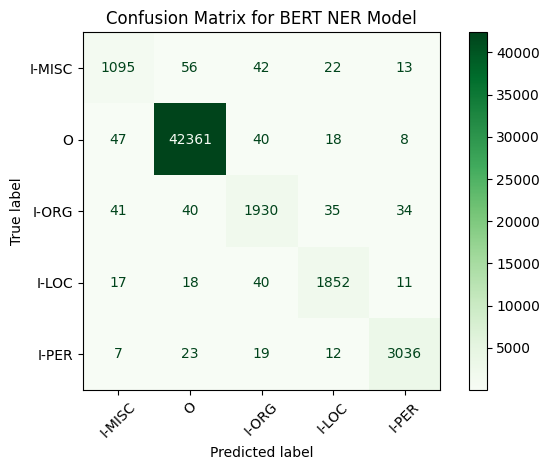

In [61]:
cm = confusion_matrix(test_tags, bert_tags_conv, labels=labels)

plt.figure(figsize=(10, 8))
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=labels)

display.plot(cmap='Greens', xticks_rotation=45)
plt.title('Confusion Matrix for BERT NER Model')
plt.tight_layout()
plt.show()

**5h.** Laquelle des deux stratégies de `tag_fusion` (premier tag ou tag majoritaire) conduit à de meilleurs résultats ?  Veuillez effectuer l'expérience et indiquer simplement les scores obtenus et votre conclusion dans le champ suivant.  Pour la conclusion finale, gardez 'first'.

Nombre total de tags : 50817
Tags différents : {'I-MISC', 'O', 'I-ORG', 'I-LOC', 'I-PER'}
Nombre total de tags : 5
              precision    recall  f1-score   support

      I-MISC       0.91      0.89      0.90      1228
           O       1.00      1.00      1.00     42474
       I-ORG       0.93      0.93      0.93      2080
       I-LOC       0.96      0.96      0.96      1938
       I-PER       0.98      0.98      0.98      3097

    accuracy                           0.99     50817
   macro avg       0.95      0.95      0.95     50817
weighted avg       0.99      0.99      0.99     50817

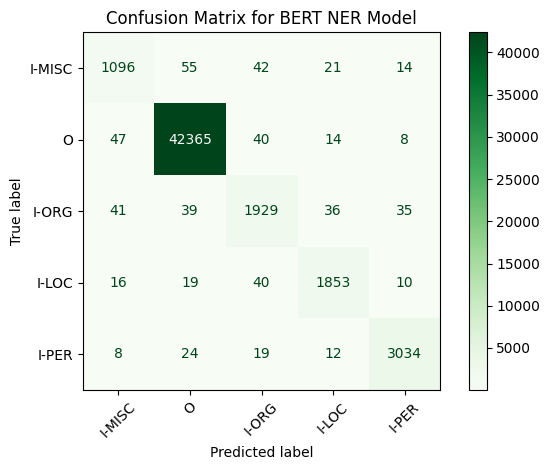

In [ ]:
## En comparant les résultats, on observe que l'approche "majority" donne des scores légèrement meilleurs que l'approche "first" sur ce jeu de test, avec un très léger gain sur certaines métriques.
# Cependant, étant donné que "majority" nécessite de compter les occurrences de chaque tag pour chaque mot, cela introduit un coût de calcul supplémentaire. 
# La méthode "first" est donc préférée en pratique car elle est plus simple, plus rapide et donne des résultats quasi équivalents.

# Conclusion finale : il est recommandé d’utiliser la méthode first.

## 6. Discussion finale

Veuillez comparer les scores des quatre modèles testés, en termes de **macro avg**.  Pourquoi ce score est-il le plus informatif ?  Veuillez indiquer également la taille des modèles spaCy évalués.

## Petit rappel des scores macro averages 

| Modèle             | Précision | Rappel  | F1-score | Support |
|--------------------|-----------|---------|----------|---------|
| NLTK               | 0.5874    | 0.5619  | 0.5553   | 50817   |
| spaCy (sm)         | 0.7844    | 0.7023  | 0.7343   | 50817   |
| spaCy (lg)         | 0.8130    | 0.7580  | 0.7747   | 50817   |
| DistilBERT_NER     | 0.9500    | 0.9500  | 0.9500   | 50817   |

## Conclusion
On utilise la macro-average pour évaluer les performances des modèles, car elle permet de donner le même poids à chaque classe, indépendamment de sa taille. Cela est particulièrement important dans le cas de la NER, où la classe 'O' est en surreprésentation par rapport aux autres classes.

Concernant les résultats obtenus, on voit que le modèle NLTK est le moins performant avec un f1-score de 0.55, ce qui fait sens car il se base sur des méthodes statistiques classiques. Ensuite, les deux modèles de spaCy sont assez proches, mais on constate que la taille du modèle a un impact sur la performance (sm 12MB, f1-score de 0.73, vs lg 382MB, f1-score de 0.77).

Enfin, le modèle DistilBERT_NER est le plus performant avec un f1-score de 0.95, ce qui est logique car il utilise une architecture basée sur les Transformers. Il est aussi intéressant de noter que DistilBERT_NER est plus léger en mémoire (262MB) que spaCy lg (382MB), tout en offrant de meilleures performances.

Ce labo illustre clairement la supériorité des modèles modernes basés sur les Transformers par rapport aux approches plus anciennes basées sur des méthodes statistiques classiques (nltk) ou bien des CNN (spaCy).




**Fin du Labo.** Veuillez nettoyer ce notebook en gardant seulement les résultats désirés, l'enregistrer, et le soumettre comme devoir sur Cyberlearn.